<a href="https://colab.research.google.com/github/alessio76/Progetto-ML/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid, train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

In [173]:
dataset = load_breast_cancer()
x,y = dataset["data"], dataset["target"]

In [174]:
#standard = 54,83
#MinMax = 41 83
#MaxAbs= 45 83
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)

In [175]:
def find_n_clusters(x,overall_cluster_sizes, min_found):
  range_n_clusters = [2, 3, 4, 5, 6]
  pca2 = PCA(2, random_state = 0)
  figure_x_pca = pca2.fit_transform(x)
  for n_clusters in range_n_clusters:
      fig, ax2 = plt.subplots()
      fig.set_size_inches(12, 6)
      kmeans = KMeans(n_clusters=n_clusters, random_state=10)
      kmeans_labels = kmeans.fit_predict(x)
      min_found.append(kmeans.inertia_)
      silhouette_avg = silhouette_score(x, kmeans_labels)
      print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
      #per tutti i punti del dataset calcolo il silhouette score, non sono divisi per cluster
      sample_silhouette_values = silhouette_samples(x, kmeans_labels)
      cluster_sizes = list()
      #####
      for i in range(n_clusters):
        #calcolo il numero di punti per cluster
          cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
          #visto che cluster_silhouette_values sono vettori 1D e shape mi dice quanti elementi ho per dimensione 
          #il primo elemento corrisponde al numero di punti per cluster
          size_cluster = cluster_silhouette_values.shape[0]
          cluster_sizes.append(size_cluster)
          color = cm.nipy_spectral(float(i) / n_clusters)
          colors = cm.nipy_spectral(kmeans_labels.astype(float) / n_clusters)
          ax2.scatter(figure_x_pca[:, 0], figure_x_pca[:, 1], marker='.', c=colors)

      overall_cluster_sizes.append(cluster_sizes)
      centers = pca2.transform(kmeans.cluster_centers_)
      ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

      for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

      ax2.set_title("Dati ridotti")
      ax2.set_xlabel("feature 1")
      ax2.set_ylabel("feature 2")

      plt.suptitle(("Analisi silhouette "
                  "clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')

plt.show()



For n_clusters = 2 The average silhouette_score is : 0.3433822406907781
For n_clusters = 3 The average silhouette_score is : 0.3143840098608098
For n_clusters = 4 The average silhouette_score is : 0.28349402837006654
For n_clusters = 5 The average silhouette_score is : 0.15963724188970196
For n_clusters = 6 The average silhouette_score is : 0.1575309997396267


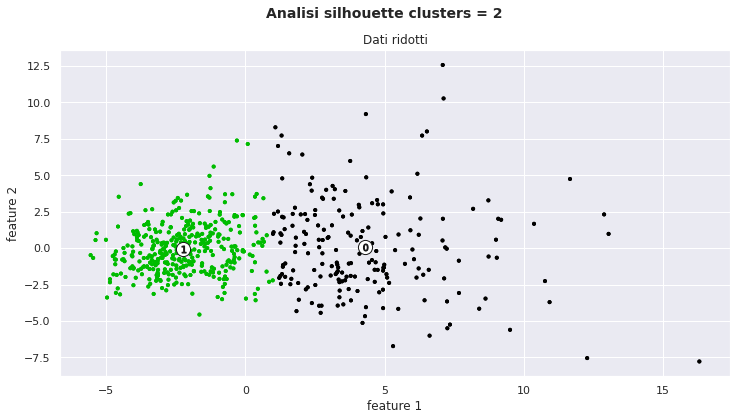

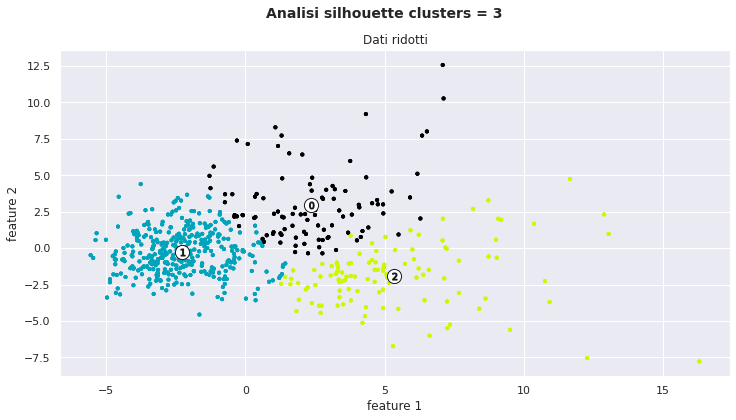

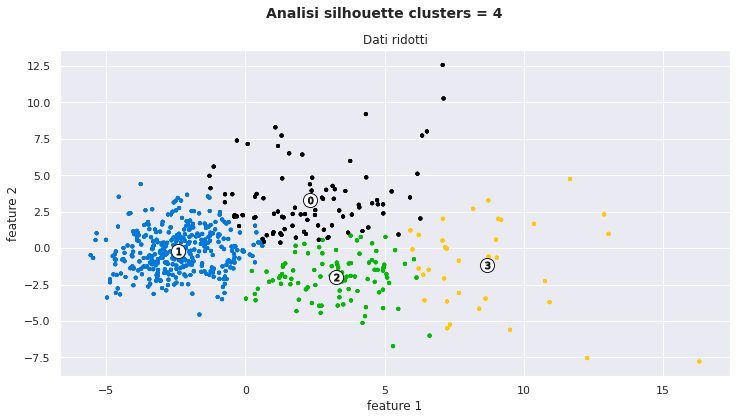

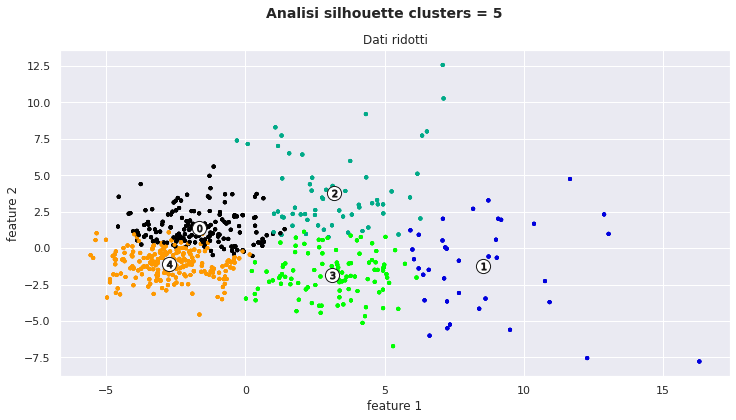

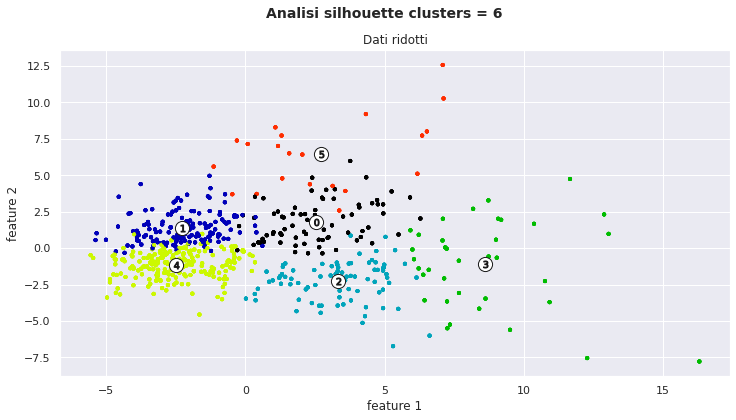

In [176]:
overall_cluster_sizes_scaled = list()
min_list_scaled = list()
find_n_clusters(scaled_x, overall_cluster_sizes_scaled, min_list_scaled)

For n_clusters = 2 The average silhouette_score is : 0.6972646156059464
For n_clusters = 3 The average silhouette_score is : 0.6660201620263426
For n_clusters = 4 The average silhouette_score is : 0.5334614737117133
For n_clusters = 5 The average silhouette_score is : 0.5120588504057626
For n_clusters = 6 The average silhouette_score is : 0.4834824577860945


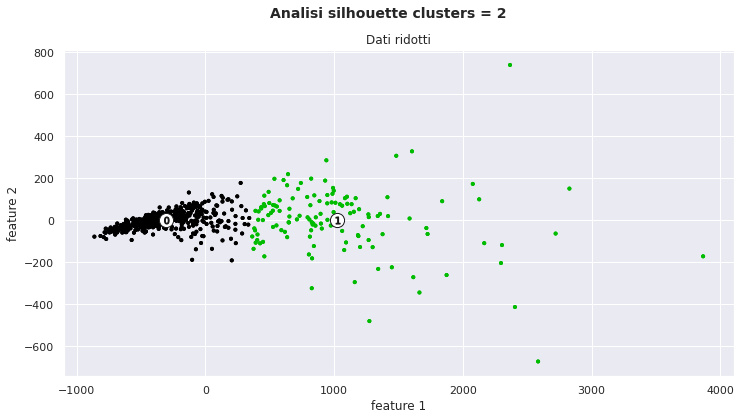

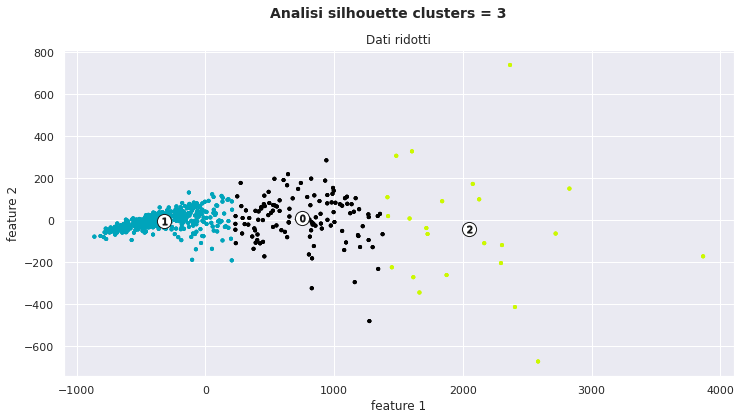

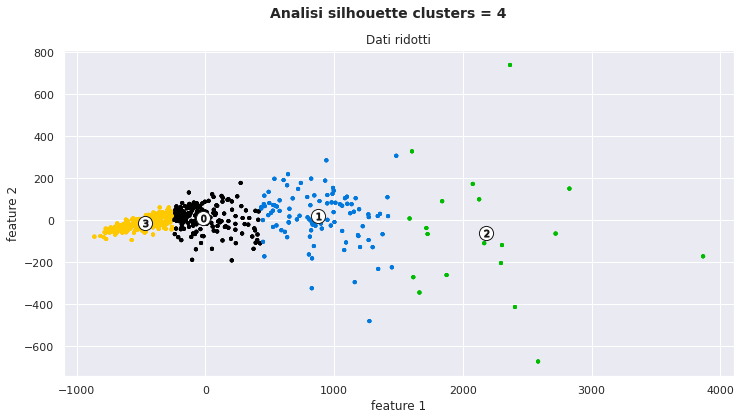

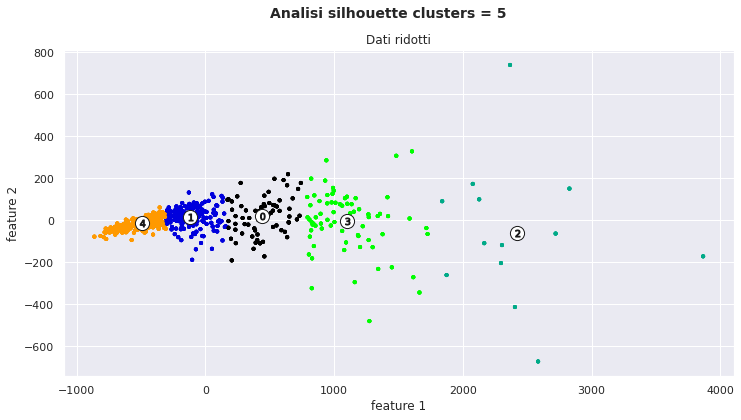

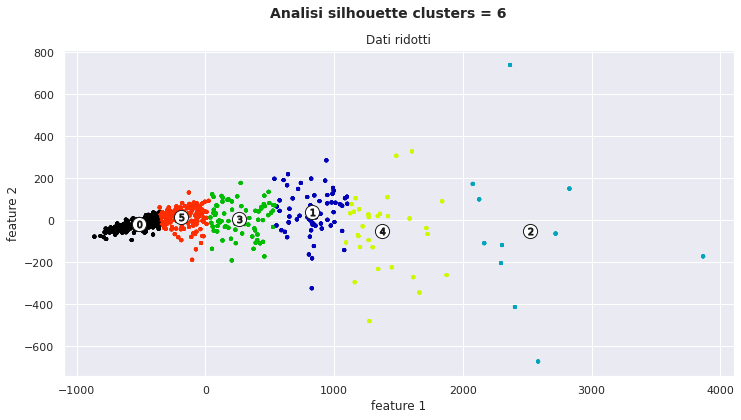

In [177]:
overall_cluster_sizes_not_scaled = list()
min_list_not_scaled = list()
find_n_clusters(x,overall_cluster_sizes_not_scaled, min_list_not_scaled)

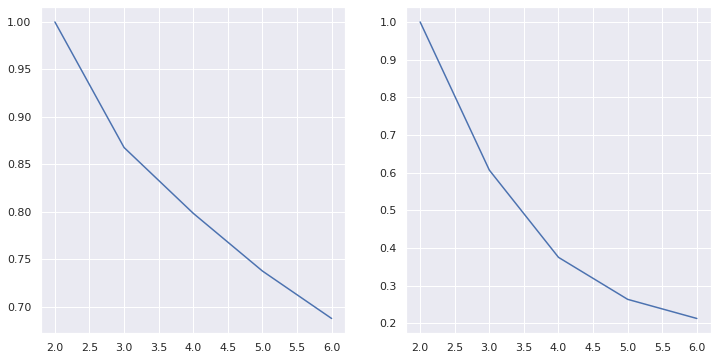

In [178]:
figure_min_scaled = np.array(min_list_scaled)/max(min_list_scaled)
figure_min_not_scaled = np.array(min_list_not_scaled)/max(min_list_not_scaled)
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(range(2,7), figure_min_scaled)
ax2.plot(range(2,7), figure_min_not_scaled)
fig.set_size_inches(12, 6)

In [179]:
def plot_sub_figure(sub_plot, labels, points):
  index1 = np.where(labels == 1)
  index0 = np.where(labels == 0)
  x0,x1 = points[index0], points[index1]
  sub_plot.scatter(x0[:,0], x0[:,1], c='r', marker ='.')
  sub_plot.scatter(x1[:,0], x1[:,1], c='b', marker ='.') 
  

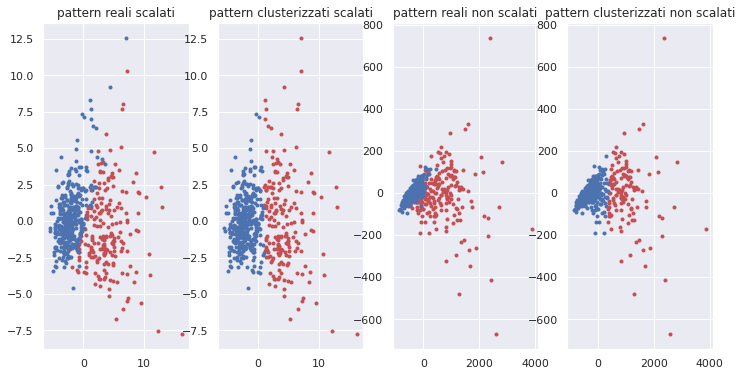

errori scalati= 54 errori non scalati= 83
515 486


In [180]:
kmeans_scaled = KMeans(n_clusters=2, random_state=10)
scaled_labels = kmeans_scaled.fit_predict(scaled_x)
kmeans_not_scaled = KMeans(n_clusters=2, random_state=10)
not_scaled_labels = kmeans_scaled.fit_predict(x)
fig, (ax_real_scaled, ax_clustered_scaled, ax_real_not_scaled, ax_clustered_not_scaled) = plt.subplots(1,4)
fig.set_size_inches(12, 6)

pca2 = PCA(2,random_state = 0)
figure_x_scaled_pca = pca2.fit_transform(scaled_x)
figure_x_not_scaled_pca = pca2.fit_transform(x)

vec0 = np.where(not_scaled_labels == 0)
vec1 = np.where(not_scaled_labels == 1)
not_scaled_labels[vec0] = 1
not_scaled_labels[vec1] = 0

plot_sub_figure(ax_real_scaled, y, figure_x_scaled_pca)
plot_sub_figure(ax_clustered_scaled, scaled_labels, figure_x_scaled_pca)
plot_sub_figure(ax_real_not_scaled, y, figure_x_not_scaled_pca)
plot_sub_figure(ax_clustered_not_scaled, not_scaled_labels, figure_x_not_scaled_pca)
ax_real_scaled.set_title("pattern reali scalati")
ax_clustered_scaled.set_title("pattern clusterizzati scalati")
ax_real_not_scaled.set_title("pattern reali non scalati")
ax_clustered_not_scaled.set_title("pattern clusterizzati non scalati")
plt.show()

correct_scaled = list(scaled_labels - y).count(0)
correct_not_scaled = list(not_scaled_labels - y).count(0)
errors_scaled = x.shape[0] - correct_scaled
errors_not_scaled = x.shape[0] - correct_not_scaled
print("errori scalati=", errors_scaled,"errori non scalati=",  errors_not_scaled)
print(correct_scaled, correct_not_scaled)